# EDA Project

<div class="alert alert-block alert-info">The EDA project in this course has four main parts to it: <br>
    
1. Project Proposal
2. Phase 1
3. Phase 2
4. Report

This notebook will be used for Project Proposal, Phase 1, and Phase 2. You will have specific questions to answer within this notebook for Project Proposal and Phase 1. You will also continue using this notebook for Phase 2. However, guidance and expectations can be found on Canvas for that assignment. The report is completed outside of this notebook (delivered as a PDF). Detailed instructions for that assignment are provided in Canvas.</div>

<div class="alert alert-block alert-danger"><b><font size=4>Read this before proceeding:</font></b>
    
1. Review the list of data sets and sources of data to avoid before choosing your data. This list is provided in the instructions for the Project Proposal assignment in Canvas.<br><br>  

2. It is expected that when you are asked questions requiring typed explanations you are to use a <b><u>markdown cell</u></b> to type your answers neatly. <b><u><i>Do not provide typed answers to questions as extra comments within your code.</i></u></b> Only provide comments within your code as you normally would, i.e. as needed to explain or remind yourself what each part of the code is doing.</div>

# Project Proposal

<div class="alert alert-block alert-info">The intent of this assignment is for you to share your chosen data file(s) with your instructor and provide general information on your goals for the EDA project.</div>

<div class="alert alert-block alert-success"><b>Step 1 (2 pts)</b>: Give a brief <i><u>description</u></i> of the source(s) of your data and include a <i><u>direct link</u></i> to your data.</div>

##### Question 1

Our source of data is from IMDb (International Movie Database) which is an online database and website for information about movies, television shows, and other streaming content. It is a popular site for people to look up inforamation about ratings, cast, directors, reviews, plot, and any other related information about the content. The 4 datasets we chose to use from their database are the Titles basics, the Ratings data, the crew data, and the name basics. The Titles basics has the name of the media, when and how long it was released or aired, run time, and the genres it belongs to. The Ratings data provides the popularity rating and number of votes of the media title. The crew data provides the IDs for directors and writers. Lastly, the Name basics provides the person's name and primary professions. More information about the data sets can be found here: https://www.imdb.com/interfaces/. The specific data sets for download are found here: https://datasets.imdbws.com/.

<div class="alert alert-block alert-success"><b>Step 2 (2 pts)</b>: Briefly explain why you chose this data.</div>

##### Question 2

Understanding data is a key characteristic to starting statistical analysis. Starting off, our team discussed interests and experiences we might have in common, ultimately agreeing with true crime media. This led us to the IMDb dataset, which we could easily understand given our backgrounds and previous use of the site. Furthermore, we were able to come up with unique questions related to True Crime that we want answered through the analysis of our dataset. While there are analytical reports of IMDb data online, we did not find any analysis related to the questions we came up with. 

Out of this database, the most relevant datasets that we believe could be useful to answer our questions were title.basics, title.ratings, name.basics and title.crew. There are many other databases such as Rotten Tomatoes or Yahoo! Movies, but IMBD allows us to easily read their tsv data files through the pandas library. This is a simple file format to manipulate and extract to dive deep into coding.

<div class="alert alert-block alert-success"><b>Step 3 (1 pt)</b>: Provide a brief overview of your goals for this project.</div>

##### Question 3

We want to understand what drives the popularity of True Crime media, and media in general over time.  Specifically, we would like to be able to prove or disprove some of the following questions by the end of this project:
  * Is it true that True Crime has become more popular over the past five years? 
  * Has there been an increase in the popularity of documentaries in general?
  * Has there been an increase in the volume of documentaries in general?
  * Is there a correlation between the air date of a True Crime TV show or movie and it's popularity? 
  * Are there correlations between the popularity of a genre, specifically True Crime, and the crew?
  
Given these questions, we'll need to import data from IMDb for the title of the production itself, the crew, the names of the crew and the ratings for that production.  We'll need to download the data, clean it (there are many nulls represented by "/N") and join it in order to proceed with answering the above questions.

<div class="alert alert-block alert-success"><b>Step 4 (1 pt)</b>: Read the data into this notebook.</div>

In [126]:
##Import libraries
import sys

import pandas as pd
import urllib.request  # used to retrieve files from the internet
import numpy as np
import re
import seaborn as sns
import plotly.express as px

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [127]:
def read_imdb_data(*args):
    '''
    Input a list of urls from imdb's datasets (https://datasets.imdbws.com/) and return a list of dataframes
    '''
    df_list = [] #instantiate a list
    if len(args):    # check to make sure the user input at least one item in the list
        for i in args:                     # for each url:
            filename = i.split('/', 3)[-1] # extract a filename from the url (everything after the 3rd "/" delimeter)
            urllib.request.urlretrieve(i, filename) #retrieve the file from the internet and copy it locally (https://docs.python.org/3/library/urllib.request.html)
            df_list.append(pd.read_csv(filename, compression='gzip', sep='\t', low_memory=False)) 
            # open the local file as a dataframe and append the dataframe to a list 
            # low_memory = False will ensure there no mixed types for the columns.  See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
    else:
        print('No URLs were passed to read_imbd_data()')
    return df_list  #returns a list of dataframes


urls = ['https://datasets.imdbws.com/title.ratings.tsv.gz',
       'https://datasets.imdbws.com/title.crew.tsv.gz',
       'https://datasets.imdbws.com/title.basics.tsv.gz',
       'https://datasets.imdbws.com/name.basics.tsv.gz']  # list of urls from imdb

df_list = read_imdb_data(*urls) # call the function with the list of urls, of any length, and save the dataframes returned

imdb_ratings, imdb_crew, imdb_title_basics, imdb_name = df_list[0], df_list[1], df_list[2], df_list[3] 
# save each dataframe independently so we can explore them

<div class="alert alert-block alert-success"><b>Step 5 (1 pt)</b>: Inspect the data using the <b>info(&nbsp;)</b>, <b>head(&nbsp;)</b>, and <b>tail(&nbsp;)</b> methods.</div>

In [128]:
# Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#       and the data types for each variable.
imdb_title_basics.info()
imdb_crew.info()
imdb_ratings.info()
imdb_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7634822 entries, 0 to 7634821
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 524.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7634822 entries, 0 to 7634821
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 174.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125117 entries, 0 to 1125116
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1125117 non-null  object 
 1   averageRating 

In [4]:
# Use the head() method to inspect the first five (or more) rows of the data
imdb_title_basics.head()
imdb_crew.head()
imdb_ratings.head()
imdb_name.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


,tconst,averageRating,numVotes
0,tt0000001,5.7,1684
1,tt0000002,6.0,207
2,tt0000003,6.5,1421
3,tt0000004,6.1,121
4,tt0000005,6.1,2220


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0031983,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0117057,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0057345,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0050976,tt0060827,tt0069467"


In [129]:
# Use the tail() method to inspect the last five (or more) rows of the data
imdb_title_basics.tail()
imdb_crew.tail()
imdb_ratings.tail()
imdb_name.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
7634817,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
7634818,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
7634819,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
7634820,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
7634821,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Animation,Comedy,Family"


,tconst,directors,writers
7634817,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
7634818,tt9916850,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
7634819,tt9916852,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377"
7634820,tt9916856,nm10538645,nm6951431
7634821,tt9916880,nm0996406,"nm1482639,nm2586970"


,tconst,averageRating,numVotes
1125112,tt9916580,7.2,5
1125113,tt9916690,6.6,5
1125114,tt9916720,6.2,72
1125115,tt9916766,6.9,16
1125116,tt9916778,7.5,27


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
10729849,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department",tt2455546
10729850,nm9993716,Essias Loberg,\N,\N,NaN,\N
10729851,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
10729852,nm9993718,Aayush Nair,\N,\N,cinematographer,\N
10729853,nm9993719,Andre Hill,\N,\N,NaN,\N


<div class="alert alert-block alert-danger"><b>STOP HERE for your Project Proposal assignment. Submit your (1) original data file(s) along with (2) the completed notebook up to this point, and (3) the html file for grading and approval.</b></div>

<div class="alert alert-block alert-warning"><b>Instructor Feedback and Approval (3 pts)</b>: Your instructor will provide feedback in either the cell below this or via Canvas. You can expect one of the following point values for this portion.

<b>3 pts</b> - if your project goals and data set are both approved.<br>
<b>2 pts</b> - if your data set is approved but changes to your project goals (Step 3) are needed.<br>
<b>1 pt</b> - if your project goals are approved but your data set is not approved.<br>
<b>0 pts</b> - if neither your data set nor your project goals are approved.<br><br>
    
<i><u>As needed, follow your instructor's feeback and guidance to get on track for the remaining portions of the EDA project.</u></i>
</div>

# EDA Phase 1

<div class="alert alert-block alert-info">The overall goal of this assignment is to take all necessary steps to inspect the quality of your data and prepare the data according to your needs. For information and resources on the process of Exploratory Data Analysis (EDA), you should explore the <b><u>EDA Project Resources Module</u></b> in Canvas.

Once you’ve read through the information provided in that module and have a comfortable understanding of EDA using Python, complete steps 6 through 10 listed below to satisfy the requirements for your EDA Phase 1 assignment. **Remember to convert code cells provided to markdown cells for any typed responses to questions.**</div>

<div class="alert alert-block alert-success"><b>Step 6 (2 pts)</b>: Begin by elaborating in more detail from the previous assignment on why you chose this data?<br>
    
1. Explain what you hope to learn from this data. 
2. Do you have a hunch about what this data will reveal? (The answer to this question will be used in the Introduction section of your EDA report.)
</div>

We hope to learn about the perceived popularity of true crime media in recent years and whether this is driving an increase in true crime documentaries or if there are factors contributing. The sample questions we hope to learn: 

* Is it true that True Crime has become more popular over time?
* Has there been a change in volume of media and/or documentaries in general?
    * Could this just be the result of media content increasing overall?
    * Could this just be the result of documenatires as a genre increasing overall? 
* Has popularity of documentaries changed over time? How does this compare to other genres?
* Is there a correlation between release date and it's popularity?
* Are there correlations between popularity and the crew? For example, is a particular director scoring higher votes and ratings?

Our hunch is that there has been both an increase in volume of media overall and in the genre. However, we believe that the genre is growing faster in popularity over time than other genres.  

<div class="alert alert-block alert-success"><b>Step 7 (2 pts)</b>: Discuss the popluation and the sample:<br>
    
1. What is the population being represented by the data you’ve chosen? 
2. What is the total sample size?
</div>

The total population of our data is the total number of titles regardless ot type, if they have a rating, or any other attribute provided. It is representative of all streaming content titles on IMDB.

The sample size we will focus on for our analysis is just the overall number of unique titles for the overall media types, aka not specific tv epsisodes just the overall tv series, and those that have a signficant number of votes to showcase accurate ratings for popularity.

## NEED TO ADD IN FINAL COUNTS
directors: 9014736
titles: 7634822

<div class="alert alert-block alert-success"><b>Step 8 (2 pts)</b>: Describe how the data was collected. For example, is this a random sample? Are sampling weights used with the data?</div>

The data that we have researched was provided by IMDB. IMDB is a website that includes many attributes of movies and tv shows. IMBD gathers data through many sources such as movie credits, interviews, press releases, etc. Due to the open nature of the website, a lot of the data is also entered through people in the industry or people visiting the site. To ensure accurate data, IMDB enforces regular quality checks. 

These datasets are not a random sample and no sample weights were used with the data. 


Sources:

https://help.imdb.com/article/imdb/general-information/where-does-the-information-on-imdb-come-from/GGD7NGF5X3ECFKNN?ref_=helpart_nav_24#


<div class="alert alert-block alert-success"><b>Step 9 (4 pts)</b>: In the Project Proposal assignment you used the info(&nbsp;) method to inspect the variables, their data types, and the number of non-null values. Using that information as a guide, provide definitions of each of your variables and their corresponding data types, i.e. a data dictionary. Also indicate which variables will be used for your purposes.</div>

### Should remove directors from media titles?

In [130]:
titles = {'Variable Name': ['tconst','primaryTitle','startYear','genre', 'nconst', 'averageRating', 'numVotes',  'primaryName', 'titleType'],
        'Data Type': ['string object','string object','string object','string object', 'string object', 'float', 'integer', 'string object', 'string object'],
        'Definition': ['title ID', 'media title', 'Release Year', 'Genre', 'Name ID', 'media rating', 'media votes', 'director''s name', 'type of media']
        }

title_df = pd.DataFrame(titles, columns = ['Variable Name', 'Data Type', 'Definition'])

title_df

director = {'Variable Name': ['directorName','directorID','tconst','startYear', 'isTrueCrime', 'averageRating', 'numVotes'],
        'Data Type': ['string object','string object','string object','string object', 'boolean', 'float', 'integer'],
        'Definition': ['director''s name', 'director''s id', 'title ID', 'Release Year', 'whether the title is true crime or not', 'media rating', 'media votes']
        }

director_df = pd.DataFrame(director, columns = ['Variable Name', 'Data Type', 'Definition'])

director_df

,Variable Name,Data Type,Definition
0,tconst,string object,title ID
1,primaryTitle,string object,media title
2,startYear,string object,Release Year
3,genre,string object,Genre
4,nconst,string object,Name ID
5,averageRating,float,media rating
6,numVotes,integer,media votes
7,primaryName,string object,directors name
8,titleType,string object,type of media


,Variable Name,Data Type,Definition
0,directorName,string object,directors name
1,directorID,string object,directors id
2,tconst,string object,title ID
3,startYear,string object,Release Year
4,isTrueCrime,boolean,whether the title is true crime or not
5,averageRating,float,media rating
6,numVotes,integer,media votes


<div class="alert alert-block alert-success"><b>Step 10 (10 pts)</b>: For full credit in this problem you'll want to <i><u>take all necessary steps to report on the quality of the data</u></i> and <i><u>clean the data accordingly</u></i>. Some things to consider while doing this are listed below. <b>Depending on your data and goals, there may be additional steps needed than those listed here.</b>
    
1. Are there rows with missing or inconsistent values? If so, eliminate those rows from your data where appropriate.
2. Are there any outliers or duplicate rows? If so, eliminate those rows from your data where appropriate. 
At each stage of cleaning the data, state how many rows were eliminated.
3. Are you using all columns (variables) in the data? If not, are you eliminating those columns?
4. Consider some type of visual display such as a boxplot to determine any outliers. Do any outliers need removed? If so, how many were removed?

At each stage of cleaning the data, state how many rows were eliminated. <b><u><i>It is good practice to get the shape of the data before and after each step in cleaning the data and add typed explanations (in separate markdown cells) of the steps taken to clean the data.</i></u></b><br></div>
    
<div class="alert alert-block alert-info">Include the rest of your work below and insert cells where needed.</div>

#### Genre Cleanup - Step 1

* Add a column with a boolean datatype where it's True if the genre field contains both 'documentary' or 'crime', case insensitive
* Count the number of true crime documentaries in the dataset.
* Display the percent of true crime documentaries in the dataset

In [131]:
## Add a column "IsTrueCrime"
imdb_title_basics['isTrueCrime'] = (imdb_title_basics.genres.str.contains('crime', 
                flags=re.IGNORECASE, na=False)) & (imdb_title_basics.genres.str.contains('documentary', 
                flags=re.IGNORECASE, na=False))

In [132]:
TrueCrimeCount = len(imdb_title_basics[imdb_title_basics["isTrueCrime"]])  ## count the number of True items in IsTrueCrime

print(f'The total number of titles in the dataset is {len(imdb_title_basics)}.')

print(f'''The number of True Crime documentaries in the dataset is {TrueCrimeCount}, which is {round(TrueCrimeCount/len(imdb_title_basics), 3)}% of the total titles.''')

The total number of titles in the dataset is 7634822.
The number of True Crime documentaries in the dataset is 20136, which is 0.003% of the total titles.


#### Director Cleanup - Step 2

We're trying to answer: "Are there correlations between popularity and the crew? For example, is a particular director scoring higher votes and ratings?"

We considered breaking out the director column into separate fields, so there was only one director per column.  
First, we checked whether this was practical by checking for the max number of directors in the imdb_crew dataset:

In [133]:
a = 0 # instantiate a
b = 0 # instantiate b

for i in imdb_crew.index:  # loop through the crew table's index
    if len(imdb_crew.directors[i].split(",")) > a: # check to see if the current director count is greater than the last
        a, b = len(imdb_crew.directors[i].split(",")), i # save the director count and index id to a and b

print(f'The title with the most number of directors has an index id of {b} in the crew table and it has {a} directors. See below for more details.')

imdb_title_basics[imdb_title_basics.tconst == imdb_crew.tconst[b]]

The title with the most number of directors has an index id of 423901 in the crew table and it has 463 directors. See below for more details.


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isTrueCrime
423901,tt0441074,tvSeries,Television Theater,Teatr Telewizji,0,1953,\N,\N,Drama,False


Given that the max number of directors in the dataset is so large (though this could be an outlier), we don't think it's practical to separate them out into separate columns.  Instead we should build a director table consisting of:

* directorName (imdb_name.primaryName)
* directorID (imdb_crew.directors)
* tconst (imdb_crew.tconst)
* startYear (imdb_title_basics.startYear)
* isTrueCrime (imdb_title_basics.IsTrueCrime)
* averageRating (imdb_ratings.averageRating)
* numVotes (imdb_ratings.numVotes)

With this dataset, we can determine whether the average rating, weighted by the number of votes, is positively correlated with the director.  We will also be able to group by whether the titles are True Crime or not.

Next, prepare the data so that we can have a "director" dataframe with a single director per row.  For the directors column, we need the string with the director IDs to be a list.

In [134]:
#Convert the directors column, which is currently a string object, to a list and assign the result to a new column
print(type(imdb_crew.directors[0])) #confirm the type of the directors column

imdb_crew['directors_list'] = imdb_crew['directors'].str.split(',')
# split the directors string into a list and create a new column from it

imdb_crew.tail()

<class 'str'>


,tconst,directors,writers,directors_list
7634817,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377","[nm5519454, nm5519375]"
7634818,tt9916850,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377","[nm5519454, nm5519375]"
7634819,tt9916852,"nm5519375,nm5519454","nm6182221,nm1628284,nm2921377","[nm5519375, nm5519454]"
7634820,tt9916856,nm10538645,nm6951431,[nm10538645]
7634821,tt9916880,nm0996406,"nm1482639,nm2586970",[nm0996406]


Next "explode" the crew data so that each row is an individual director

In [135]:
directors = imdb_crew.explode('directors_list').drop(columns=['directors', 'writers'], inplace=False)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html
# this will create a new dataframe where each row is an individual director.  We drop the directors and 
# writers columns

directors.rename(columns={"directors_list": "director"}, inplace = True) 
# rename the directors_list column to "director" since it's no longer a list

directors.tail()

,tconst,director
7634818,tt9916850,nm5519375
7634819,tt9916852,nm5519375
7634819,tt9916852,nm5519454
7634820,tt9916856,nm10538645
7634821,tt9916880,nm0996406


Create the final directors dataframe by merging data from imbd_name, imdb_title_basics and imdb_ratings.  Print the number of shape of the dataframe before and after each merge: use a left merge (`how='left'`) so we can clean the dataframe appropriately later.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [136]:
print(f'The original dataframe has a shape of {directors.shape}')

# Merge in the director's name and drop the redundant nconst field
directors = pd.merge(directors, imdb_name[['nconst','primaryName']], left_on = 'director', right_on = 'nconst', how='left').drop(columns=['nconst'], inplace = False)
print(f'After merging in data from the imdb_name dataframe, directors has a shape of {directors.shape}')

# Merge in the IsTrueCrime field
directors = pd.merge(directors, imdb_title_basics[['tconst','isTrueCrime', 'startYear']], on = 'tconst', how='left')
print(f'After merging in data from the imdb_title_basics dataframe, directors has a shape of {directors.shape}')

# Merge in the averageRating and numVotes fields
directors = pd.merge(directors, imdb_ratings[['tconst','averageRating', 'numVotes']], on = 'tconst', how='left')
print(f'After merging in data from the imdb_ratings dataframe, directors has a shape of {directors.shape}')

directors.tail()

The original dataframe has a shape of (9014736, 2)
After merging in data from the imdb_name dataframe, directors has a shape of (9014736, 3)
After merging in data from the imdb_title_basics dataframe, directors has a shape of (9014736, 5)
After merging in data from the imdb_ratings dataframe, directors has a shape of (9014736, 7)


,tconst,director,primaryName,isTrueCrime,startYear,averageRating,numVotes
9014731,tt9916850,nm5519375,Deniz Yorulmazer,False,2010,NaN,NaN
9014732,tt9916852,nm5519375,Deniz Yorulmazer,False,2010,NaN,NaN
9014733,tt9916852,nm5519454,Semih Bagci,False,2010,NaN,NaN
9014734,tt9916856,nm10538645,Johan Planefeldt,False,2015,NaN,NaN
9014735,tt9916880,nm0996406,Hilary Audus,False,2014,NaN,NaN


#### Titles Cleanup - Step 3

In this step we will focus on dropping nulls, uncessary columns, and uncessary values in the columns. 

First, we will create a working copy of the title basics called media_titles. Then we will remove the nulls for the titles and genres.

In [137]:
media_titles = imdb_title_basics #Create new table for analysis
media_titles.shape  #This is the original population size

(7634822, 10)

In [138]:
null_ptitles = media_titles[media_titles.primaryTitle.isnull()]
null_ptitles

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isTrueCrime
1419373,tt10790040,tvEpisode,NaN,NaN,0,2019,\N,\N,\N,False
3841497,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography,False
3934048,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music,False
5099580,tt4404732,tvEpisode,NaN,NaN,0,2015,\N,\N,Comedy,False
5708162,tt5773048,tvEpisode,NaN,NaN,0,2015,\N,\N,Talk-Show,False
6953493,tt8473688,tvEpisode,NaN,NaN,0,1987,\N,\N,Drama,False
6985205,tt8541336,tvEpisode,NaN,NaN,0,2018,\N,\N,"Reality-TV,Romance",False
7590764,tt9824302,tvEpisode,NaN,NaN,0,2016,\N,\N,Documentary,False


In [139]:
null_otitles = media_titles[media_titles.originalTitle.isnull()]
null_otitles

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isTrueCrime
1419373,tt10790040,tvEpisode,NaN,NaN,0,2019,\N,\N,\N,False
3841497,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography,False
3934048,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music,False
5099580,tt4404732,tvEpisode,NaN,NaN,0,2015,\N,\N,Comedy,False
5708162,tt5773048,tvEpisode,NaN,NaN,0,2015,\N,\N,Talk-Show,False
6953493,tt8473688,tvEpisode,NaN,NaN,0,1987,\N,\N,Drama,False
6985205,tt8541336,tvEpisode,NaN,NaN,0,2018,\N,\N,"Reality-TV,Romance",False
7590764,tt9824302,tvEpisode,NaN,NaN,0,2016,\N,\N,Documentary,False


In [140]:
media_titles = media_titles.drop(null_ptitles.index)  
media_titles.shape 

(7634814, 10)

This only removed 8 titles. 

In [141]:
null_genres = media_titles[media_titles.genres.isnull()]
media_titles = media_titles.drop(null_genres.index)
media_titles.shape

(7634804, 10)

This ended up removing 10 titles.

In [142]:
media_titles.isnull().sum() #recheck and display the number of missing values in each column

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
isTrueCrime       0
dtype: int64

After reviewing the results, we noticied there are other values associated as null in our dataset like \N. We will come back to address those. 

Now, we will drop the unnecessary columns for our analysis and merge in the average ratings and number of votes. We did not see use for if the title is for adults, what the end year is, the run time minutes, or what the original title was. This will drop 4 columns, but also add in 2 from the ratings dataset.

In [143]:
media_titles = media_titles.drop(columns=['isAdult','endYear','runtimeMinutes','originalTitle'], inplace=False)
media_titles.info()                                 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7634804 entries, 0 to 7634821
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   tconst        object
 1   titleType     object
 2   primaryTitle  object
 3   startYear     object
 4   genres        object
 5   isTrueCrime   bool  
dtypes: bool(1), object(5)
memory usage: 356.8+ MB


In [144]:
media_titles.shape

(7634804, 6)

In [145]:
#merge the average ratings and votes
media_titles = pd.merge(media_titles, imdb_ratings[['tconst','averageRating', 'numVotes']], on = 'tconst', how='left')

In [146]:
media_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7634804 entries, 0 to 7634803
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   tconst         object 
 1   titleType      object 
 2   primaryTitle   object 
 3   startYear      object 
 4   genres         object 
 5   isTrueCrime    bool   
 6   averageRating  float64
 7   numVotes       float64
dtypes: bool(1), float64(2), object(5)
memory usage: 473.3+ MB


Next, we will remove titles that are out of scope for analysis. We will not be looking at indivudal TV epsiodes, audiobooks, radio series', video games, or other episodes. 

In [147]:
media_titles.titleType.value_counts()

tvEpisode       5538841
short            795153
movie            568734
video            295703
tvSeries         201862
tvMovie          130087
tvMiniSeries      35957
tvSpecial         31491
videoGame         27373
tvShort            9600
episode               1
radioSeries           1
audiobook             1
Name: titleType, dtype: int64

In [148]:
#remove tvEpisodes,videogame,radioSeries,audiobook,episode becasue they aren't relevant. For example, tvEpisode is just a subset of a tvSeries.

indextype1 = media_titles[media_titles.titleType == 'episode'].index
media_titles = media_titles.drop(indextype1)

indextype2 = media_titles[media_titles.titleType == 'audiobook'].index
media_titles = media_titles.drop(indextype2)

indextype3 = media_titles[media_titles.titleType == 'radioSeries'].index
media_titles = media_titles.drop(indextype3)

indextype4 = media_titles[media_titles.titleType == 'videoGame'].index
media_titles = media_titles.drop(indextype4)

indextype5 = media_titles[media_titles.titleType == 'tvEpisode'].index
media_titles = media_titles.drop(indextype5)


In [149]:
media_titles.titleType.value_counts()

short           795153
movie           568734
video           295703
tvSeries        201862
tvMovie         130087
tvMiniSeries     35957
tvSpecial        31491
tvShort           9600
Name: titleType, dtype: int64

In [150]:
media_titles.shape #From 7631524 to 2067987

(2068587, 8)

This dropped 5,563,537 titles from our media titles dataframe.

#### Remove Null Values & Duplicates - Step 4

Now we will re-address the additional null values and check for duplciates. To account for them, we need to covert everything to null. We chose to drop all nulls from our directors and media_titles dataframes instead of imputing because after reviewing a sample of the data, a majority of the nulls were for title types that were not relevant to our analysis anyway. For example, TV episodes with missing directors. We also believe the most popular mainstream media is populated on IMDB which will be represented in our data analysis.


In [151]:
# first convert '/N' to nulls. Then grab the total number of null values after coversion
directors.shape # dataframe shape as a starting point
((directors.isnull())).sum() # count of nulls we start with 

directors.replace(to_replace = '\\N', value = np.NaN, inplace=True) # replace all '/N' strings with NaN
(directors.isnull()).sum() # we see the count of nulls increase

directors.dropna(inplace=True) #drop all the rows with a null value (NaN)

(directors.isnull()).sum() # we see the count of nulls go to zero
directors.shape # we see a decrease from 9010972 rows to 1266176 due to all the missing data

(9014736, 7)

tconst                 0
director               0
primaryName      3250139
isTrueCrime            0
startYear              0
averageRating    7575907
numVotes         7575907
dtype: int64

tconst                 0
director         3250093
primaryName      3250139
isTrueCrime            0
startYear         859998
averageRating    7575907
numVotes         7575907
dtype: int64

tconst           0
director         0
primaryName      0
isTrueCrime      0
startYear        0
averageRating    0
numVotes         0
dtype: int64

(1266324, 7)

For our directors table, we deleted 7,744,796 rows that all had missing information. 

In [152]:
# first convert '/N' to nulls as well. Then grab the total number of null values after coversion
# titles table - conversion
media_titles.shape # dataframe shape as a starting point
((media_titles.isnull())).sum()# count of nulls we start with 

media_titles.replace(to_replace = '\\N', value = np.NaN, inplace=True) # replace all '/N' strings with NaN
(media_titles.isnull()).sum() # we see the count of nulls increase

media_titles.dropna(inplace=True) #drop all the rows with a null value (NaN)

(media_titles.isnull()).sum() # we see the count of nulls go to zero
media_titles.shape # we see a decrease from 2067987 rows to 576250 due to all the missing data

(2068587, 8)

tconst                 0
titleType              0
primaryTitle           0
startYear              0
genres                 0
isTrueCrime            0
averageRating    1474609
numVotes         1474609
dtype: int64

tconst                 0
titleType              0
primaryTitle           0
startYear         111366
genres            114298
isTrueCrime            0
averageRating    1474609
numVotes         1474609
dtype: int64

tconst           0
titleType        0
primaryTitle     0
startYear        0
genres           0
isTrueCrime      0
averageRating    0
numVotes         0
dtype: int64

(576324, 8)

We now have 576,250 titles in our media_titles data set. We dropped 1,491,737 titles due to their missing data.

Now, we will check for duplicates.

In [153]:
media_titles.head()
duplicate_media_titles = media_titles.duplicated('tconst')
duplicate_media_titles.value_counts()

,tconst,titleType,primaryTitle,startYear,genres,isTrueCrime,averageRating,numVotes
0,tt0000001,short,Carmencita,1894,"Documentary,Short",False,5.7,1684.0
1,tt0000002,short,Le clown et ses chiens,1892,"Animation,Short",False,6.0,207.0
2,tt0000003,short,Pauvre Pierrot,1892,"Animation,Comedy,Romance",False,6.5,1421.0
3,tt0000004,short,Un bon bock,1892,"Animation,Short",False,6.1,121.0
4,tt0000005,short,Blacksmith Scene,1893,"Comedy,Short",False,6.1,2221.0


False    576324
dtype: int64

In [154]:
directors.head()
duplicate_dir_tconst = directors.duplicated(subset=['tconst'])
duplicate_dir_tconst.value_counts() #313642 duplicate titles in the directors table

,tconst,director,primaryName,isTrueCrime,startYear,averageRating,numVotes
0,tt0000001,nm0005690,William K.L. Dickson,False,1894,5.7,1684.0
1,tt0000002,nm0721526,Émile Reynaud,False,1892,6.0,207.0
2,tt0000003,nm0721526,Émile Reynaud,False,1892,6.5,1421.0
3,tt0000004,nm0721526,Émile Reynaud,False,1892,6.1,121.0
4,tt0000005,nm0005690,William K.L. Dickson,False,1893,6.1,2221.0


False    952639
True     313685
dtype: int64

In [155]:
duplicate_dir_director = directors.duplicated(subset=['director'])
duplicate_dir_director.value_counts() #1019989 duplicate directors in the directors table

True     1020122
False     246202
dtype: int64

In [156]:
duplicate_dir_both = directors.duplicated()
duplicate_dir_both.value_counts() #no duplicate rows in directors table

False    1266324
dtype: int64

There were no duplicate titles in our media_titles dataset. As expected, we see duplicate titles in the directors dataset because a director can direct for multiple movies. Likewise, we see multiple titles because movies can have more than one director. However, we do not see any duplicate rows in the directors table.



#### Outliers & Graph


* directors should only have titles frmo the media_titles dataframe
* do it against avg scores/popularity due to low volume of ratings (an example)
* drop a title from the media titles and directors table if the number of ratings is low... 
* question 4 & 2(outliers)

In [188]:
director_popularity = directors[['director', 'primaryName', 'averageRating','numVotes']].groupby(['director', 'primaryName']).agg(['mean'])
director_popularity.head()
director_popularity.info()
director_popularity.sort_values(by=[('numVotes', 'mean')], ascending = False)[:10]
director_popularity.sort_values(by=[('averageRating', 'mean')], ascending = False)[:10]
## we probably should drop rows from this that have less than n votes

,,averageRating,numVotes
,,mean,mean
director,primaryName,,
nm0000005,Ingmar Bergman,7.328395,9259.814815
nm0000008,Marlon Brando,7.100000,10157.000000
nm0000009,Richard Burton,5.600000,938.000000
nm0000010,James Cagney,5.800000,225.000000
nm0000018,Kirk Douglas,5.850000,1089.000000


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 246202 entries, ('nm0000005', 'Ingmar Bergman') to ('nm9993281', 'Marija Ratkovic Vidakovic')
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   (averageRating, mean)  246202 non-null  float64
 1   (numVotes, mean)       246202 non-null  float64
dtypes: float64(2)
memory usage: 9.3+ MB


,,averageRating,numVotes
,,mean,mean
director,primaryName,,
nm0849164,Loveleen Tandan,8.000000,800362.000000
nm0634240,Christopher Nolan,7.800000,768527.687500
nm2297407,George Mastras,9.600000,745933.000000
nm0000233,Quentin Tarantino,7.695833,413214.458333
nm1888967,D.B. Weiss,7.300000,411280.800000
nm0821432,Chad Stahelski,7.433333,395476.000000
nm2937122,Adrian Molina,8.400000,387898.000000
nm0881279,Lee Unkrich,7.577778,383371.222222


,,averageRating,numVotes
,,mean,mean
director,primaryName,,
nm11569450,Damon Corbin,10.0,5.0
nm11203808,Nate Carzon,10.0,6.0
nm6688105,Adam Lehnert-Spalding,10.0,5.0
nm10402859,Marcus Klepp,10.0,5.0
nm11103683,Josh Buoy,10.0,10.0
nm1195949,Tomislav Perica,10.0,9.0
nm0430043,Judi Jordan,10.0,6.0
nm8241570,Pany Konstantinidou,10.0,6.0


<AxesSubplot:>

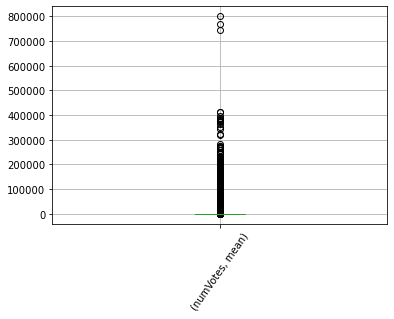

In [189]:
# boxplots
director_popularity.boxplot(column=[('numVotes', 'mean')], rot=55)
#fig = px.box(director_popularity, y=('numVotes', 'mean'))
#fig.show()

#fig = px.box(directors, y="numVotes", points="all")
#fig.show()

<div class="alert alert-block alert-danger"><b>STOP HERE for your EDA Phase 1 assignment. Submit your <i><u>cleaned</u></i> data file along with the completed notebook up to this point for grading.</b></div>

# EDA Phase 2

<div class="alert alert-block alert-info">All of your work for the EDA Phase 2 assignment will begin below here. Refer to the detailed instructions and expectations for this assignment in Canvas.</div>